In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn import cross_validation, metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [2]:
X_train = pd.read_csv("X_train.csv")     #change to the actual file path here!!!
y_train = pd.read_csv("y_train.csv")

In [3]:
X_train.head()

,Unnamed: 0,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,117214.0,0.128865,67.0,0.0,0.352588,5833.0,8.0,0.0,1.0,0.0,0.0
1,1,144723.0,0.179496,32.0,1.0,0.245922,5700.0,10.0,1.0,0.0,0.0,0.0
2,2,27113.0,0.528844,53.0,0.0,0.491452,11990.0,15.0,0.0,3.0,0.0,3.0
3,3,142706.0,0.018850,52.0,0.0,0.299567,5083.0,15.0,0.0,2.0,0.0,0.0
4,4,14250.0,0.569364,32.0,2.0,0.649189,4500.0,10.0,0.0,1.0,2.0,2.0


In [4]:
X_train.shape

(80546, 12)

In [5]:
X_train = X_train.iloc[:, 2:]       #unselect unnecessary columns
X_train.shape

(80546, 10)

In [6]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.128865,67.0,0.0,0.352588,5833.0,8.0,0.0,1.0,0.0,0.0
1,0.179496,32.0,1.0,0.245922,5700.0,10.0,1.0,0.0,0.0,0.0
2,0.528844,53.0,0.0,0.491452,11990.0,15.0,0.0,3.0,0.0,3.0
3,0.018850,52.0,0.0,0.299567,5083.0,15.0,0.0,2.0,0.0,0.0
4,0.569364,32.0,2.0,0.649189,4500.0,10.0,0.0,1.0,2.0,2.0


In [7]:
y_train.shape

(80546, 1)

In [8]:
y_train.head()

,y
0,0
1,0
2,0
3,0
4,0


both X and y are dataframes

In [9]:
y_train = y_train.squeeze()
print(type(y_train))
y_train.head()

<class 'pandas.core.series.Series'>


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [10]:
print(X_train.shape)
print(y_train.shape)

(80546, 10)
(80546,)


In [11]:
#read in testing data
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

X_test = X_test.iloc[:, 1:]      #unselect unnecessary column
print(X_test.shape)
X_test.head()

(10890, 10)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.380893,43.0,0.0,0.860000,4899.0,7.0,0.0,2.0,0.0,2.0
1,0.068433,67.0,0.0,0.226901,18333.0,19.0,0.0,1.0,0.0,2.0
2,0.055606,63.0,1.0,0.049925,9974.0,5.0,0.0,0.0,0.0,2.0
3,0.000000,25.0,0.0,0.000000,5000.0,1.0,0.0,0.0,0.0,0.0
4,1.000000,41.0,0.0,0.163138,4958.0,4.0,0.0,0.0,0.0,0.0


In [12]:
print(y_test.shape)
#y_test.head()
y_test = y_test.squeeze()
print(type(y_test))
print(y_test.shape)
y_test.head()

(10890, 1)
<class 'pandas.core.series.Series'>
(10890,)


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### plotting graph of the cleaned training data

(array([ 8697.,  3842.,  2880.,  2300.,  1895.,  1636.,  1459.,  1419.,
         1289.,  1153.,  1214.,  1132.,  1101.,  1055.,   926.,  1079.,
          966.,  1034.,   982.,   883.,   950.,   967.,   944.,   985.,
          970.,   989.,  1013.,   961.,   970.,   933.,  1043.,   943.,
         1018.,   944.,  1016.,  1058.,  1042.,  1028.,  1107.,  1088.,
         1137.,  1185.,  1170.,  1214.,  1408.,  1508.,  1557.,  1749.,
         2035., 10672.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

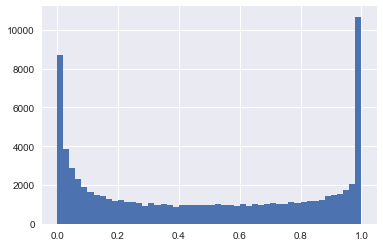

In [17]:
#RevolvingUtilizationOfUnsecuredLines
plt.hist(X_train.iloc[:, 0], bins=50)

(array([ 5952., 16866., 24163., 18541., 11229.,  3795.]),
 array([21.        , 30.83333333, 40.66666667, 50.5       , 60.33333333,
        70.16666667, 80.        ]),
 <a list of 6 Patch objects>)

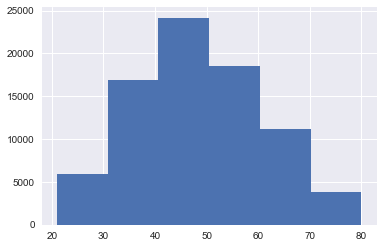

In [42]:
#age
plt.hist(X_train.iloc[:, 1], bins=6)

(array([5.7942e+04, 1.3842e+04, 5.2500e+03, 2.1540e+03, 8.3400e+02,
        3.0400e+02, 1.3600e+02, 4.2000e+01, 2.7000e+01, 9.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]),
 <a list of 13 Patch objects>)

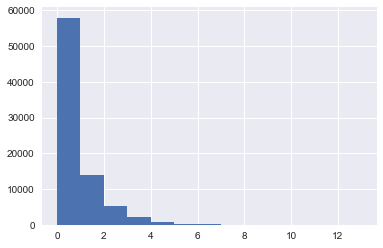

In [40]:
#NumberOfTime30-59DaysPastDueNotWorse
plt.hist(X_train.iloc[:, 2], bins=13)

(array([5209., 1810., 1784., 1957., 2102., 2262., 2405., 2487., 2637.,
        2752., 2887., 2962., 2909., 2861., 2918., 2875., 2748., 2621.,
        2712., 2525., 2303., 2228., 2158., 1919., 1765., 1712., 1512.,
        1375., 1238., 1189., 1093., 1032.,  889.,  808.,  766.,  639.,
         574.,  556.,  476.,  404.,  394.,  347.,  320.,  283.,  273.,
         211.,  196.,  180.,  140.,  143.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

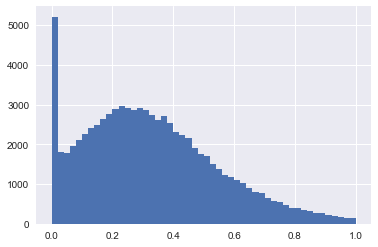

In [30]:
#DebtRatio
plt.hist(X_train.iloc[:, 3], bins=50)

(array([3912., 2540., 2980., 3857., 3488., 4803., 4363., 4482., 4177.,
        3637., 4332., 3458., 2707., 3535., 2663., 2357., 1972., 2008.,
        1987., 1810., 1363., 1401., 1164., 1593.,  856., 1090.,  803.,
         507.,  726.,  415.,  561.,  431.,  336.,  275.,  374., 1457.,
         407.,  185.,  185.,  234.,  133.,  165.,  137.,  102.,  159.,
          87.,   81.,   65.,   54.,  132.]),
 array([ 1000.,  1380.,  1760.,  2140.,  2520.,  2900.,  3280.,  3660.,
         4040.,  4420.,  4800.,  5180.,  5560.,  5940.,  6320.,  6700.,
         7080.,  7460.,  7840.,  8220.,  8600.,  8980.,  9360.,  9740.,
        10120., 10500., 10880., 11260., 11640., 12020., 12400., 12780.,
        13160., 13540., 13920., 14300., 14680., 15060., 15440., 15820.,
        16200., 16580., 16960., 17340., 17720., 18100., 18480., 18860.,
        19240., 19620., 20000.]),
 <a list of 50 Patch objects>)

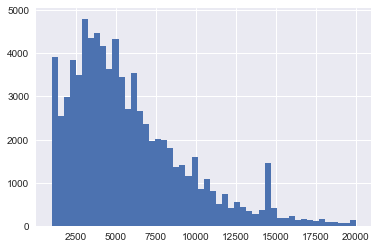

In [32]:
#MonthlyIncome
plt.hist(X_train.iloc[:, 4], bins=50)

(array([ 979., 2381., 3595., 5043., 6222., 7043., 7261., 7117., 6719.,
        6211., 5334., 4513., 3835., 3093., 2685., 2121., 1707., 1375.,
        2345.,  967.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

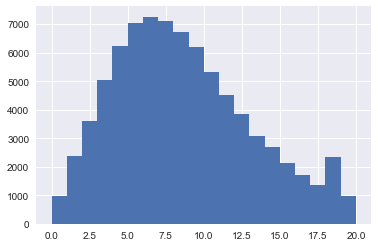

In [35]:
#NumberOfOpenCreditLinesAndLoans
plt.hist(X_train.iloc[:, 5], bins=20)

(array([6.9178e+04, 7.0700e+03, 2.4610e+03, 1.0010e+03, 4.0200e+02,
        1.8300e+02, 9.9000e+01, 5.4000e+01, 4.1000e+01, 2.1000e+01,
        1.4000e+01, 1.2000e+01, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17.]),
 <a list of 17 Patch objects>)

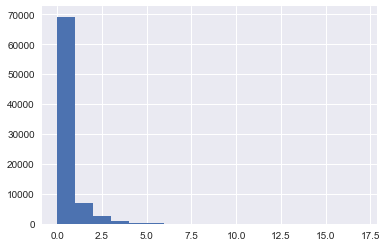

In [47]:
#NumberOfTimes90DaysLate
plt.hist(X_train.iloc[:, 6], bins=17)

(array([35399., 26471., 14356.,  4320.]),
 array([0., 1., 2., 3., 4.]),
 <a list of 4 Patch objects>)

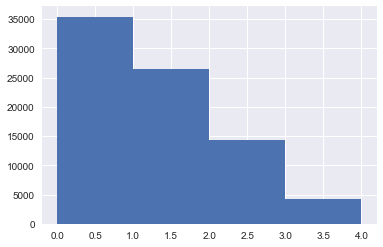

In [49]:
#NumberRealEstateLoansOrLines
plt.hist(X_train.iloc[:, 7], bins=4)

(array([7.2568e+04, 6.1180e+03, 1.3100e+03, 3.4400e+02, 1.2500e+02,
        4.4000e+01, 1.8000e+01, 8.0000e+00, 5.0000e+00, 2.0000e+00,
        4.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 11 Patch objects>)

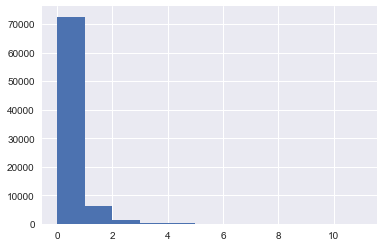

In [51]:
#NumberOfTime60-89DaysPastDueNotWorse
plt.hist(X_train.iloc[:, 8], bins=11)

(array([43021., 18882., 12063.,  4961.,  1619.]),
 array([0., 1., 2., 3., 4., 5.]),
 <a list of 5 Patch objects>)

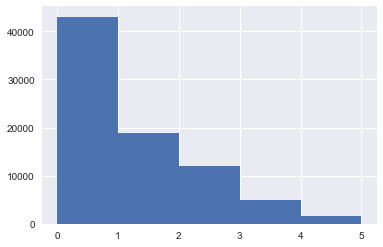

In [54]:
#NumberOfDependents
plt.hist(X_train.iloc[:, 9], bins=5)

(array([40273.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 40273.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

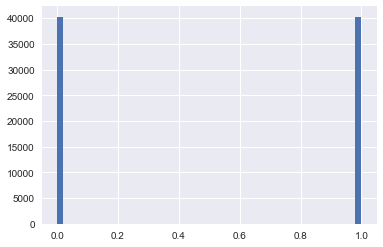

In [55]:
#y variable
plt.hist(y_train.iloc[:,0], bins=50)

### "Precision" formula: TP/(TP+FP)
### "Recall(Sensivity)" formula: TP/(TP+FN)

### Logistic Regressions

#### Basic L2 Logistic Regression without any tuning or processing

In [13]:
from sklearn.linear_model import LogisticRegression
from matplotlib import cm
model_lr_basic = LogisticRegression(penalty = "l2", C = 99999999)
model_lr_basic.fit(X_train, y_train)
y_train_predicted = model_lr_basic.predict(X_train)
y_test_predicted = model_lr_basic.predict(X_test)

scores_lrtrain_cv = cross_val_score(model_lr_basic, X_train, y_train, cv = 10)
scores_lrtest_cv = cross_val_score(model_lr_basic, X_test, y_test, cv = 10)

print(" - Training accuracy score:")
print(" ", scores_lrtrain_cv.mean())
print(" - Testing accuracy score:")
print(" ", scores_lrtest_cv.mean())

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

 - Training accuracy score:
  0.7933861744791673
 - Testing accuracy score:
  0.5273743591473288


In [16]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_predicted)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[4315 1130]
 [4405 1040]]
 - Precision:
0.4792626728110599
 - Recall:
0.1942110177404295


In [17]:
#AUC scores
model_lr_basic_scores_proba = model_lr_basic.predict_proba(X_train)
model_lr_basic_scores = model_lr_basic_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_lr_basic_scores))

model_lr_basic_scores_proba = model_lr_basic.predict_proba(X_test)
model_lr_basic_scores = model_lr_basic_scores_proba[:,1]

print("Testing AUC Score:", roc_auc_score(y_test, model_lr_basic_scores))

Training AUC Score: 0.8803082838035297
Testing AUC Score: 0.5262255411616794


### Logistic Regression with L1 regularization (tuning)

In [29]:
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LogisticRegression(penalty = 'l1'))
])
parameters = {
    #'model__C': [1,100,200,300,400,500,600,700,800,900,1000]
    'model__C': [x for x in np.logspace(-3, 3, num = 6)]
    #'C': [100,120,140,160,180,200,220,240,260,280,300]
}
#model = LogisticRegression(penalty = 'l1')
grid_search = GridSearchCV(pipeline, param_grid = parameters, scoring = 'accuracy', cv=10, return_train_score = True)
grid_search.fit(X_train, y_train)
print(grid_search.cv_results_)
print(grid_search.best_params_)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

{'mean_fit_time': array([0.16895614, 0.20090034, 0.18834107, 0.20277171, 0.17661595,
       0.16889248]), 'std_fit_time': array([0.02001218, 0.02535878, 0.02175696, 0.02906706, 0.01698254,
       0.00753639]), 'mean_score_time': array([0.00253429, 0.00279565, 0.00235207, 0.00260129, 0.00230155,
       0.00216422]), 'std_score_time': array([4.59904770e-04, 6.78389404e-04, 2.79314545e-04, 5.43269797e-04,
       2.43643239e-04, 7.80813530e-05]), 'param_model__C': masked_array(data=[0.001, 0.015848931924611134, 0.25118864315095796,
                   3.981071705534969, 63.0957344480193, 1000.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'model__C': 0.001}, {'model__C': 0.015848931924611134}, {'model__C': 0.25118864315095796}, {'model__C': 3.981071705534969}, {'model__C': 63.0957344480193}, {'model__C': 1000.0}], 'split0_test_score': array([0.76142006, 0.76464747, 0.76415094, 0.76415094, 0.76415094,
       0.7

In [30]:
model_optim = grid_search.best_estimator_
model_optim.fit(X_train, y_train)
y_train_pred = model_optim.predict(X_train)
print("Training Accuracy score:", accuracy_score(y_train, y_train_pred))
y_test_pred = model_optim.predict(X_test)
print("Testing Accuracy score:", accuracy_score(y_test, y_test_pred))

Training Accuracy score: 0.793298239515308
Testing Accuracy score: 0.4913682277318641


/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[4306 1139]
 [4400 1045]]
 - Precision:
0.4784798534798535
 - Recall:
0.19529059988787142


In [32]:
model_optim_scores_proba = model_optim.predict_proba(X_train)
model_optim_scores = model_optim_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_optim_scores))

model_optim_scores_proba = model_optim.predict_proba(X_test)
model_optim_scores = model_optim_scores_proba[:,1]
print("Testing AUC Score:", roc_auc_score(y_test, model_optim_scores))

Training AUC Score: 0.8798407604005131
Testing AUC Score: 0.5263540488784666


### Logistic regression with L2 regularization (tuning)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

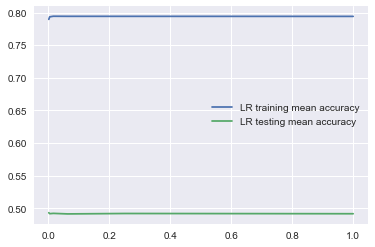

In [39]:
from sklearn.linear_model import LogisticRegression
from matplotlib import cm
train_history_LR = []
test_history_LR = []
for n in np.logspace(-3, 0, num = 6):
    model_lr_L1 = LogisticRegression(penalty = "l2", C = n)
    model_lr_L1.fit(X_train, y_train)
    y_train_predicted = model_lr_L1.predict(X_train)
    y_test_predicted = model_lr_L1.predict(X_test)
    train_history_LR.append(model_lr_L1.score(X_train, y_train))
    test_history_LR.append(model_lr_L1.score(X_test, y_test))

plt.plot(np.logspace(-3,0,num=6), train_history_LR,label='LR training mean accuracy')
plt.plot(np.logspace(-3,0,num=6), test_history_LR,label='LR testing mean accuracy')

plt.legend()

In [41]:
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LogisticRegression(solver="lbfgs",penalty = 'l2'))
])
parameters = {
    #'model__C': [1,100,200,300,400,500,600,700,800,900,1000]
    'model__C': [x for x in np.logspace(-5, 3, num = 8)]
    #'C': [100,120,140,160,180,200,220,240,260,280,300]
}

grid_search = GridSearchCV(pipeline, param_grid = parameters, scoring = 'accuracy', cv=10, return_train_score = True)
grid_search.fit(X_train, y_train)
print(grid_search.cv_results_)
print(grid_search.best_params_)

{'mean_fit_time': array([0.1143429 , 0.13418808, 0.17992465, 0.20350785, 0.21774879,
       0.17495761, 0.16868906, 0.16700792]), 'std_fit_time': array([0.014541  , 0.01211819, 0.03152251, 0.03369808, 0.03236931,
       0.01389209, 0.01337299, 0.01100196]), 'mean_score_time': array([0.00209966, 0.0022646 , 0.0026962 , 0.00272179, 0.00243313,
       0.00197372, 0.00203259, 0.00197618]), 'std_score_time': array([2.03991978e-04, 4.28399075e-04, 8.13883823e-04, 8.20487644e-04,
       5.90740727e-04, 2.56676619e-05, 2.18377781e-04, 3.27688188e-05]), 'param_model__C': masked_array(data=[1e-05, 0.00013894954943731373, 0.0019306977288832496,
                   0.026826957952797246, 0.3727593720314938,
                   5.179474679231202, 71.96856730011514, 1000.0],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'model__C': 1e-05}, {'model__C': 0.00013894954943731373}, {'model__C': 0.0019306977288832496}

In [42]:
model_optim = grid_search.best_estimator_
model_optim.fit(X_train, y_train)
y_train_pred = model_optim.predict(X_train)
print("Training Accuracy score:", accuracy_score(y_train, y_train_pred))
y_test_pred = model_optim.predict(X_test)
print("Testing Accuracy score:", accuracy_score(y_test, y_test_pred))

Training Accuracy score: 0.7933106547811188
Testing Accuracy score: 0.49348025711662075


In [43]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[4371 1074]
 [4442 1003]]
 - Precision:
0.48290804044294655
 - Recall:
0.18663937476739859


In [45]:
model_optim_scores_proba = model_optim.predict_proba(X_train)
model_optim_scores = model_optim_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_optim_scores))

model_optim_scores_proba = model_optim.predict_proba(X_test)
model_optim_scores = model_optim_scores_proba[:,1]
print("Testing AUC Score:", roc_auc_score(y_test, model_optim_scores))

Training AUC Score: 0.8804397062651874
Testing AUC Score: 0.526105634355071


### Classification Tree

In [46]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(80546, 10)
(10890, 10)


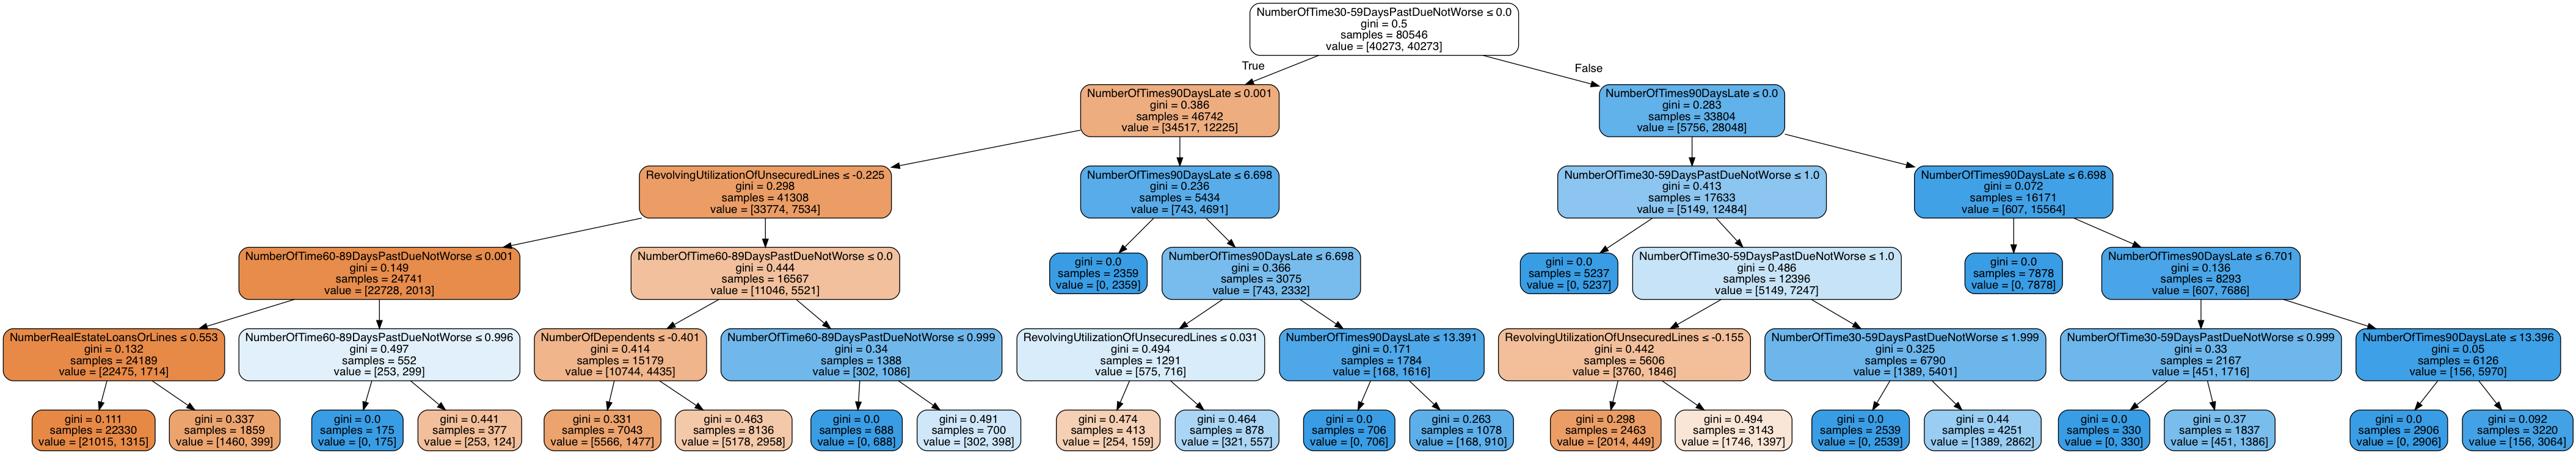

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train_scaled,y_train)

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True,
               special_characters = True, feature_names = list(X_train.columns))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [48]:
#nake model without tuning
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9999627542025675
Testing Accuracy: 0.7436179981634528


In [49]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[4584  861]
 [1931 3514]]
 - Precision:
0.8032
 - Recall:
0.43393430476660905


In [50]:
model_scores_proba = model.predict_proba(X_train_scaled)
model_scores = model_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_scores))

model_scores_proba = model.predict_proba(X_test_scaled)
model_scores = model_scores_proba[:,1]

print("Testing AUC Score:", roc_auc_score(y_test, model_scores))

Training AUC Score: 0.9999999916765034
Testing AUC Score: 0.7446023639011368


### three parameter to tune:
### max_depth;
### min_samples_leaf;
### min_samples_split

###### "max_depth"

try exploring "max_depth" parameter tuning range

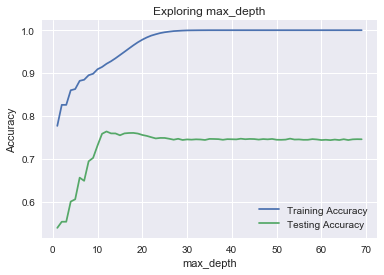

In [51]:
train_accuracy_history = []
test_accuracy_history = []
for n in range(1,70):
    classifier_1 = DecisionTreeClassifier(max_depth = n)
    classifier_1.fit(X_train_scaled, y_train)
    classifier_train_pred_1 = classifier_1.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred_1)) 
    classifier_test_pred_1 = classifier_1.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred_1))

plt.title('Exploring max_depth')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.plot(range(1,70), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(1,70), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

##### from the graph we can see that the turning point is basically around "max_depth=12"

In [54]:
#further tuning based on exploration
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

parameters = {
    'max_depth': [x for x in range(10,20,1)]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters, scoring = 'accuracy', cv=10, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
print(grid_search.cv_results_)
print(grid_search.best_params_)

{'mean_fit_time': array([0.43018417, 0.49026294, 0.4751446 , 0.50695651, 0.51216762,
       0.50846555, 0.49430017, 0.53108835, 0.5188859 , 0.48922434]), 'std_fit_time': array([0.04151836, 0.03788002, 0.03615971, 0.03909642, 0.0471988 ,
       0.03885002, 0.01820895, 0.05642518, 0.03687289, 0.01387958]), 'mean_score_time': array([0.00174417, 0.00184119, 0.00169921, 0.00201838, 0.00244839,
       0.00236433, 0.00247145, 0.00250845, 0.00236833, 0.00236394]), 'std_score_time': array([0.00028018, 0.00041612, 0.0001135 , 0.00038537, 0.0008879 ,
       0.00075177, 0.00065133, 0.00048287, 0.00037464, 0.00013798]), 'param_max_depth': masked_array(data=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 10}, {'max_depth': 11}, {'max_depth': 12}, {'max_depth': 13}, {'max_depth': 14}, {'max_depth': 15}, {'max_depth': 16}, {'m

In [56]:
model_optim = grid_search.best_estimator_
model_optim.fit(X_train_scaled, y_train)
y_train_pred = model_optim.predict(X_train_scaled)
print("Training Accuracy score:", accuracy_score(y_train, y_train_pred))
y_test_pred = model_optim.predict(X_test_scaled)
print("Testing Accuracy score:", accuracy_score(y_test, y_test_pred))

Training Accuracy score: 0.9215851811387282
Testing Accuracy score: 0.7637281910009183


In [57]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[5073  372]
 [2201 3244]]
 - Precision:
0.8971238938053098
 - Recall:
0.39004448719490203


In [58]:
model_optim_scores_proba = model_optim.predict_proba(X_train_scaled)
model_optim_scores = model_optim_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_optim_scores))

model_optim_scores_proba = model_optim.predict_proba(X_test_scaled)
model_optim_scores = model_optim_scores_proba[:,1]
print("Testing AUC Score:", roc_auc_score(y_test, model_optim_scores))

Training AUC Score: 0.9706852912715969
Testing AUC Score: 0.7552652832692903


###### "min_samples_leaf"

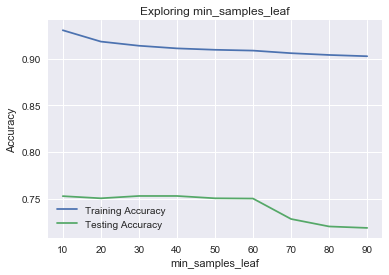

In [61]:
train_accuracy_history = []
test_accuracy_history = []
for n in range(10,100,10):
    classifier = DecisionTreeClassifier(min_samples_leaf = n)
    classifier.fit(X_train_scaled, y_train)
    classifier_train_pred = classifier.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred)) 
    classifier_test_pred = classifier.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred))

plt.title('Exploring min_samples_leaf')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.plot(range(10,100,10), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(10,100,10), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

In [62]:
#further tuning based on exploration
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

parameters = {
    'min_samples_leaf': [x for x in range(10,80,10)]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters, scoring = 'accuracy', cv=10, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
print(grid_search.cv_results_)
print(grid_search.best_params_)

{'mean_fit_time': array([0.55690389, 0.51802392, 0.5084084 , 0.45593841, 0.42359765,
       0.40395908, 0.40125582]), 'std_fit_time': array([0.03558541, 0.04146558, 0.05089792, 0.01699649, 0.02045212,
       0.00802889, 0.00956262]), 'mean_score_time': array([0.00297763, 0.00231521, 0.00238614, 0.00212345, 0.00182984,
       0.00183289, 0.0018348 ]), 'std_score_time': array([0.00084106, 0.00058642, 0.0005789 , 0.00050755, 0.00014444,
       0.00011633, 0.0001672 ]), 'param_min_samples_leaf': masked_array(data=[10, 20, 30, 40, 50, 60, 70],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'min_samples_leaf': 10}, {'min_samples_leaf': 20}, {'min_samples_leaf': 30}, {'min_samples_leaf': 40}, {'min_samples_leaf': 50}, {'min_samples_leaf': 60}, {'min_samples_leaf': 70}], 'split0_test_score': array([0.63021351, 0.63803376, 0.63344091, 0.63157895, 0.64200596,
       0.64523337, 0.64771599]), 'split1_test_score': 

In [63]:
model_optim = grid_search.best_estimator_
model_optim.fit(X_train_scaled, y_train)
y_train_pred = model_optim.predict(X_train_scaled)
print("Training Accuracy score:", accuracy_score(y_train, y_train_pred))
y_test_pred = model_optim.predict(X_test_scaled)
print("Testing Accuracy score:", accuracy_score(y_test, y_test_pred))

Training Accuracy score: 0.9096665259603208
Testing Accuracy score: 0.7504132231404959


In [64]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[5012  433]
 [2285 3160]]
 - Precision:
0.8794878931255219
 - Recall:
0.3866862457170827


In [65]:
model_optim_scores_proba = model_optim.predict_proba(X_train_scaled)
model_optim_scores = model_optim_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_optim_scores))

model_optim_scores_proba = model_optim.predict_proba(X_test_scaled)
model_optim_scores = model_optim_scores_proba[:,1]
print("Testing AUC Score:", roc_auc_score(y_test, model_optim_scores))

Training AUC Score: 0.9706831169893294
Testing AUC Score: 0.7587498324087356


###### "min_samples_split"

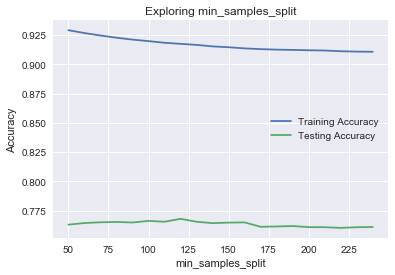

In [68]:
train_accuracy_history = []
test_accuracy_history = []
for n in range(50,250,10):
    classifier = DecisionTreeClassifier(min_samples_split = n)
    classifier.fit(X_train, y_train)
    classifier_train_pred = classifier.predict(X_train)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred)) 
    classifier_test_pred = classifier.predict(X_test)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred))

plt.title('Exploring min_samples_split')
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.plot(range(50,250,10), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(50,250,10), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

In [70]:
#further tuning based on exploration
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

parameters = {
    'min_samples_split': [x for x in range(50,125,10)]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters, scoring = 'accuracy', cv=10, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
#print(grid_search.cv_results_)
print(grid_search.best_params_)

{'min_samples_split': 80}


In [71]:
model_optim = grid_search.best_estimator_
model_optim.fit(X_train_scaled, y_train)
y_train_pred = model_optim.predict(X_train_scaled)
print("Training Accuracy score:", accuracy_score(y_train, y_train_pred))
y_test_pred = model_optim.predict(X_test_scaled)
print("Testing Accuracy score:", accuracy_score(y_test, y_test_pred))

Training Accuracy score: 0.9227025550617038
Testing Accuracy score: 0.7652892561983471


In [72]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[4928  517]
 [2039 3406]]
 - Precision:
0.8682131022176905
 - Recall:
0.40868730501559875


In [73]:
model_optim_scores_proba = model_optim.predict_proba(X_train_scaled)
model_optim_scores = model_optim_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_optim_scores))

model_optim_scores_proba = model_optim.predict_proba(X_test_scaled)
model_optim_scores = model_optim_scores_proba[:,1]
print("Testing AUC Score:", roc_auc_score(y_test, model_optim_scores))

Training AUC Score: 0.9799014436845211
Testing AUC Score: 0.7672753075457808


try tuning three parameters

In [74]:
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

parameters = {
    'max_depth': [x for x in range(10,20,2)],
    'min_samples_leaf': [x for x in range(40,60,5)],
    'min_samples_split': [x for x in range(70,90,5)]
}
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', cv=10, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
#print(grid_search.best_score_)
print(grid_search.best_params_)

{'max_depth': 14, 'min_samples_leaf': 50, 'min_samples_split': 70}


In [75]:
model_optim = grid_search.best_estimator_
model_optim.fit(X_train_scaled, y_train)
y_train_pred = model_optim.predict(X_train_scaled)
print("Training Accuracy score:", accuracy_score(y_train, y_train_pred))
y_test_pred = model_optim.predict(X_test_scaled)
print("Testing Accuracy score:", accuracy_score(y_test, y_test_pred))

Training Accuracy score: 0.9096292801628882
Testing Accuracy score: 0.749862258953168


In [76]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[5006  439]
 [2285 3160]]
 - Precision:
0.8780216726868575
 - Recall:
0.3869703649277492


In [77]:
model_optim_scores_proba = model_optim.predict_proba(X_train_scaled)
model_optim_scores = model_optim_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_optim_scores))

model_optim_scores_proba = model_optim.predict_proba(X_test_scaled)
model_optim_scores = model_optim_scores_proba[:,1]
print("Testing AUC Score:", roc_auc_score(y_test, model_optim_scores))

Training AUC Score: 0.9694174590503344
Testing AUC Score: 0.7560233776111561


### KNN

In [78]:
from sklearn.preprocessing import RobustScaler

In [79]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(80546, 10)
(10890, 10)


In [81]:
#nake model without tuning (default n_neighbors = 5)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9050108012812554
Testing Accuracy: 0.5446280991735537


In [82]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[4457  988]
 [3971 1474]]
 - Precision:
0.5987002437043054
 - Recall:
0.2485247007250042


In [83]:
model_scores_proba = model.predict_proba(X_train_scaled)
model_scores = model_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_scores))

model_scores_proba = model.predict_proba(X_test_scaled)
model_scores = model_scores_proba[:,1]

print("Testing AUC Score:", roc_auc_score(y_test, model_scores))

Training AUC Score: 0.9725515132246527
Testing AUC Score: 0.5640678932239163


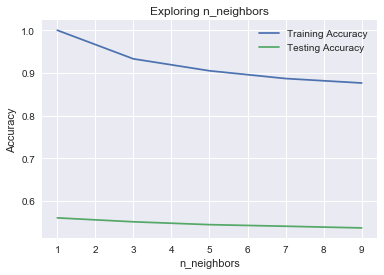

In [98]:
#exploring tuning
train_accuracy_history = []
test_accuracy_history = []
for n in range(1,10,2):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train_scaled, y_train)
    knn_train_pred = knn.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, knn_train_pred)) 
    knn_test_pred = knn.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, knn_test_pred))

plt.title('Exploring n_neighbors')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.plot(range(1,10,2), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(1,10,2), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

In [102]:
#try manually exploration of tuning
# after multiple attempts, it's found that the Nearest Neighbor Model("n_neighbors=1") has the highest testing accuracy score
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9999627542025675
Testing Accuracy: 0.560514233241506


In [103]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[4534  911]
 [3875 1570]]
 - Precision:
0.6328093510681176
 - Recall:
0.2572083879423329


In [104]:
model_scores_proba = model.predict_proba(X_train_scaled)
model_scores = model_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_scores))

model_scores_proba = model.predict_proba(X_test_scaled)
model_scores = model_scores_proba[:,1]

print("Testing AUC Score:", roc_auc_score(y_test, model_scores))

Training AUC Score: 0.9999627542025675
Testing AUC Score: 0.5605142332415058


Note that "n_neighbors=1" KNN model is actually the most complex model among all "K-neighbors" models.

### Naive Bayes

In [108]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)
#y_train = np.array(y_train)
#y_test = np.array(y_test)
#y_train = y_train.reshape(y_train.shape[0],1)
#y_test = y_test.reshape(y_test.shape[0],1)
print(y_train.shape)
print(y_test.shape)

(80546, 10)
(10890, 10)
(80546,)
(10890,)


#### Gaussian Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model_nb = GaussianNB(priors=None);
model_nb.fit(X_train_scaled,y_train);
y_train_nbpred = model_nb.predict(X_train_scaled)
y_test_nbpred = model_nb.predict(X_test_scaled)
score_nbtrain = accuracy_score(y_train, y_train_nbpred)
score_nbtest = accuracy_score(y_test, y_test_nbpred)

print("Gaussian Naive Bayes:")
print(" - Training Accuracy score:")
print("  ", score_nbtrain)
print(" - Testing Accuracy score:")
print("  ", score_nbtest)


model_scores_proba = model_nb.predict_proba(X_train_scaled)
model_scores = model_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_scores))

model_scores_proba = model_nb.predict_proba(X_test_scaled)
model_scores = model_scores_proba[:,1]

print("Testing AUC Score:", roc_auc_score(y_test, model_scores))

Gaussian Naive Bayes:
 - Training Accuracy score:
   0.7452263302957316
 - Testing Accuracy score:
   0.4952249770431589
Training AUC Score: 0.8672438746616591
Testing AUC Score: 0.5405481309463278


In [117]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_nbpred)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[4826  619]
 [4878  567]]
 - Precision:
0.47807757166947723
 - Recall:
0.10513628778045615


We cannot use "Multinomial Naive Bayes" here, because "MultinomialNB" is intended to be used with discrete counts of outcome observed over certain number of trials(mostly text classification) and doesn't allow negative X values; and we cannot use "Bernoulli Naive Bayes" here because "BernoulliNB" is intended to work with binary-valued features.

### Essemble: Stacking

#### Stacking the two top-performing models: AdaBoost & Gradient Boosting models trained before

In [118]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)
#y_train = np.array(y_train)
#y_test = np.array(y_test)
#y_train = y_train.reshape(y_train.shape[0],1)
#y_test = y_test.reshape(y_test.shape[0],1)
print(y_train.shape)
print(y_test.shape)

(80546, 10)
(10890, 10)
(80546,)
(10890,)


In [125]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

np.set_printoptions(suppress=True)      #not using scientific computing format

model_AdaBoost = AdaBoostClassifier(n_estimators=2000, learning_rate=1.3)
model_AdaBoost.fit(X_train_scaled, y_train)
model_gbc = GradientBoostingClassifier(max_depth=5, min_samples_split=4, n_estimators=391, subsample=1.0)
model_gbc.fit(X_train_scaled, y_train)
classifiers = [model_AdaBoost, model_gbc]

S_train = np.c_[[model.predict(X_train_scaled) for model in classifiers]].T
S_test = np.c_[[model.predict(X_test_scaled) for model in classifiers]].T
meta_model = LogisticRegression()
meta_model.fit(S_train, y_train)
y_train_meta = meta_model.predict(S_train)
y_test_meta = meta_model.predict(S_test)

#print(y_train_meta)
#print(y_test_meta)
print("Stacking:")
print(" - Training accuracy score:", accuracy_score(y_train, y_train_meta))
print(" - Testing accuracy score:", accuracy_score(y_test, y_test_meta))


Stacking:
 - Training accuracy score: 0.938469942641472
 - Testing accuracy score: 0.8509641873278236


/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [126]:
#confusion matrix
print(" - Testing Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_meta)
print(confusion)
# All ratios
tn, fp, fn, tp = confusion.ravel()
#print("tp:", tp)
#print("fp:", fp)
#print("fn:", fn)
print(" - Precision:")
print(tp/(tp+fp))
print(" - Recall:")
print(tp/(tp+tn))

 - Testing Confusion Matrix:
[[5068  377]
 [1246 4199]]
 - Precision:
0.9176136363636364
 - Recall:
0.4531131973670012


In [127]:
model_scores_proba = meta_model.predict_proba(S_train)
model_scores = model_scores_proba[:,1]

print("Training AUC Score:", roc_auc_score(y_train, model_scores))

model_scores_proba = meta_model.predict_proba(S_test)
model_scores = model_scores_proba[:,1]

print("Testing AUC Score:", roc_auc_score(y_test, model_scores))

Training AUC Score: 0.9410192865964517
Testing AUC Score: 0.8618287052847533
